In [74]:
import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import acquire
import prepare

In [75]:
def prep_titanic():
    titanic_db = acquire.get_titanic_data()
    titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])
    dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True])#, True])
    titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
    return titanic_db

In [76]:
def split_data(df, stratify_col):
    train_validate, test = train_test_split(df, test_size = .2, random_state=823, stratify=df[stratify_col])
    train, validate = train_test_split(train_validate, test_size=.25, random_state=823, stratify=train_validate[stratify_col])
    return train, validate, test

In [78]:
titanic = prep_titanic()
titanic.isna().sum()

Unnamed: 0                 0
passenger_id               0
survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embark_town                2
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [79]:
titanic.survived.value_counts()


0    549
1    342
Name: survived, dtype: int64

In [80]:
baseline = 549 / (549 + 342)
baseline

0.6161616161616161

Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

Based on the exploration exercises, fare, sex and travelling alone seem to have the highest correlation with survival and should prove high in the ranking on the decision tree

In [81]:
titanic = titanic.drop(columns=['Unnamed: 0', 'sex', 'embark_town'])

In [82]:
titanic=titanic.astype(str)

In [83]:
titanic.dtypes

passenger_id               object
survived                   object
pclass                     object
sibsp                      object
parch                      object
fare                       object
alone                      object
sex_male                   object
embark_town_Queenstown     object
embark_town_Southampton    object
dtype: object

In [84]:
train, validate, test = split_data(titanic, stratify_col='survived')

In [85]:
X_train = train.drop(columns=['survived'])
y_train = train.survived

X_validate = validate.drop(columns=['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

In [86]:
clf = DecisionTreeClassifier(max_depth=3, random_state=823)

In [87]:
clf = clf.fit(X_train, y_train)

[Text(0.5, 0.875, 'sex_male <= 0.5\ngini = 0.473\nsamples = 534\nvalue = [329, 205]\nclass = 0'),
 Text(0.25, 0.625, 'pclass <= 2.5\ngini = 0.388\nsamples = 182\nvalue = [48, 134]\nclass = 1'),
 Text(0.125, 0.375, 'fare <= 11.25\ngini = 0.075\nsamples = 103\nvalue = [4, 99]\nclass = 1'),
 Text(0.0625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = 1'),
 Text(0.1875, 0.125, 'gini = 0.059\nsamples = 99\nvalue = [3, 96]\nclass = 1'),
 Text(0.375, 0.375, 'fare <= 23.35\ngini = 0.494\nsamples = 79\nvalue = [44, 35]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.497\nsamples = 63\nvalue = [29, 34]\nclass = 1'),
 Text(0.4375, 0.125, 'gini = 0.117\nsamples = 16\nvalue = [15, 1]\nclass = 0'),
 Text(0.75, 0.625, 'fare <= 15.173\ngini = 0.322\nsamples = 352\nvalue = [281, 71]\nclass = 0'),
 Text(0.625, 0.375, 'fare <= 7.91\ngini = 0.198\nsamples = 198\nvalue = [176, 22]\nclass = 0'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 100\nvalue = [95, 5]\nclass = 0'),
 Text(0.6875, 0.125, 'g

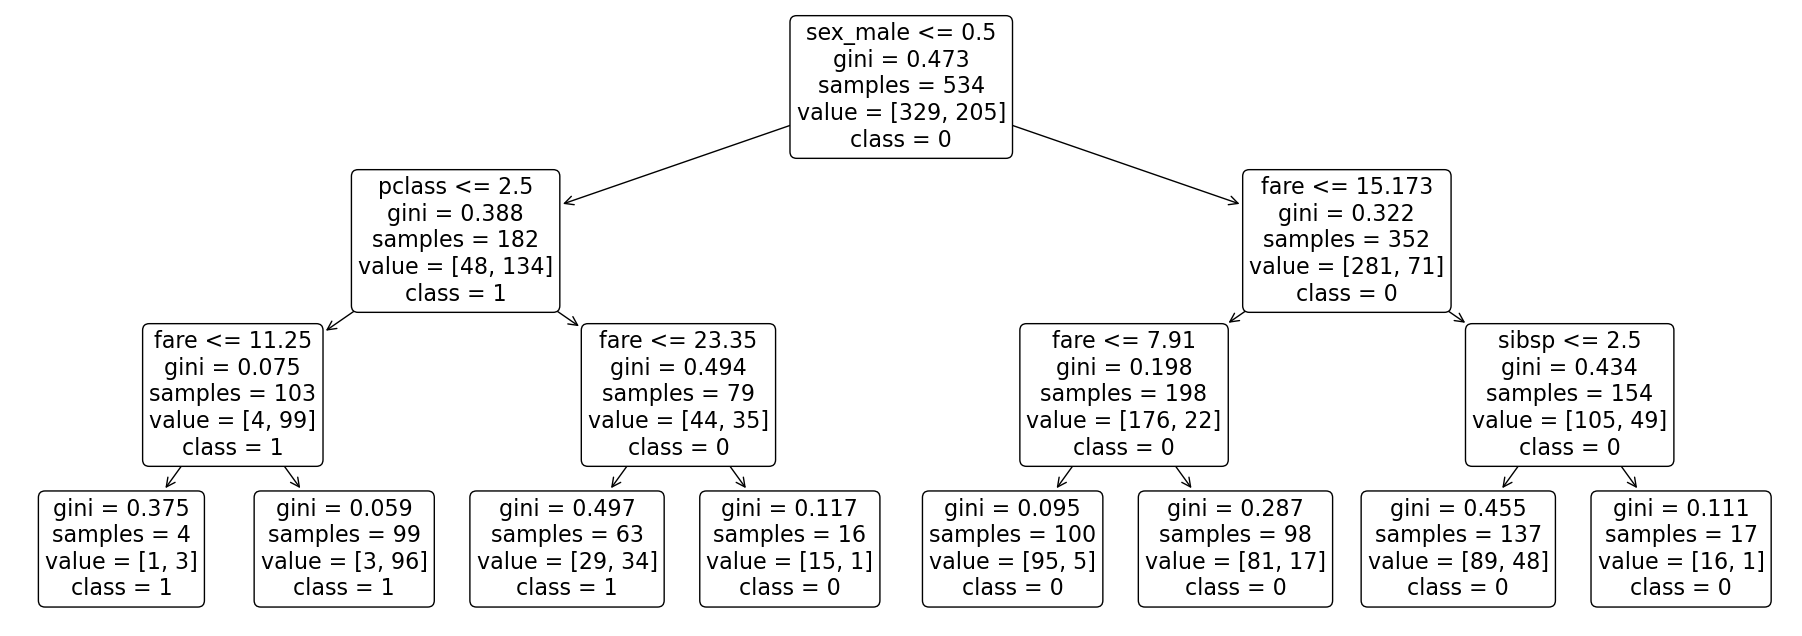

In [88]:
plt.figure(figsize=(23, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

it seems that travelling alone did not factor much in this tree

In [89]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['0', '1', '1', '0', '0'], dtype=object)

In [90]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba

array([[0.95      , 0.05      ],
       [0.03030303, 0.96969697],
       [0.03030303, 0.96969697],
       ...,
       [0.46031746, 0.53968254],
       [0.9375    , 0.0625    ],
       [0.03030303, 0.96969697]])

Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [91]:
print('Accuracy of Decision Tree classifier on training set: {:.8f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80337079


In [92]:
confusion_matrix(y_train, y_pred)

array([[296,  33],
       [ 72, 133]])

In [93]:
y_train.value_counts()

0    329
1    205
Name: survived, dtype: int64

In [94]:
labels = sorted(y_train.unique())

In [95]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,0,1
0,296,33
1,72,133


In [96]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       329
           1       0.80      0.65      0.72       205

    accuracy                           0.80       534
   macro avg       0.80      0.77      0.78       534
weighted avg       0.80      0.80      0.80       534



In order to be consistent with the confusion matrix the positive is dead and the negative is survived!

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$ = $\frac{429}{534}$ = 0.8033707865168539

True Positive Rate = $\frac{TP}{TP+TN+FP+FN}$ = $\frac{296}{534}$ = 0.5543071161048689

True Negative Rate = $\frac{TN}{TP+TN+FP+FN}$ = $\frac{133}{534}$ = 0.24906367041198502

False Positive Rate = $\frac{FP}{TP+TN+FP+FN}$ = $\frac{72}{534}$ = 0.1348314606741573

False Negative Rate = $\frac{FN}{TP+TN+FP+FN}$ = $\frac{33}{534}$ = 0.06179775280898876

Precision = $\frac{TP}{Predicted Positive}$ = $\frac{TP}{TP+FP}$ = $\frac{296}{368}$ = 0.8043478260869565

Recall/Sensitivity = $\frac{TP}{Actual Positive}$ = $\frac{TP}{TP+FN}$ = $\frac{296}{329}$ = 0.899696048632218

F1-Score =  $\frac{1}{2*(\frac{1}{Precision}+\frac{1}{Recall})}$ = $\frac{2 * Precision * Recall}{Precision + Recall}$ = $\frac{2* \frac{296}{368} * \frac{296}{329}}{\frac{296}{368} + \frac{296}{329}}$  = 0.8493543758967003

Support = 329 for pos 205 for negative 534 for the test.


Run through steps 2-4 using a different max_depth value.

In [97]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i, random_state=823)
    clf = clf = clf.fit(X_train, y_train)
    print(f'Accuracy of Decision Tree classifier on training set with depth {i}: {clf.score(X_train, y_train)})')
    print(f'     Accuracy of Decision Tree classifier on validate set with depth {i}: {clf.score(X_validate, y_validate)})')
    

Accuracy of Decision Tree classifier on training set with depth 1: 0.7771535580524345)
     Accuracy of Decision Tree classifier on validate set with depth 1: 0.7696629213483146)
Accuracy of Decision Tree classifier on training set with depth 2: 0.7940074906367042)
     Accuracy of Decision Tree classifier on validate set with depth 2: 0.7528089887640449)
Accuracy of Decision Tree classifier on training set with depth 3: 0.8033707865168539)
     Accuracy of Decision Tree classifier on validate set with depth 3: 0.8089887640449438)
Accuracy of Decision Tree classifier on training set with depth 4: 0.8164794007490637)
     Accuracy of Decision Tree classifier on validate set with depth 4: 0.7696629213483146)
Accuracy of Decision Tree classifier on training set with depth 5: 0.8389513108614233)
     Accuracy of Decision Tree classifier on validate set with depth 5: 0.7247191011235955)
Accuracy of Decision Tree classifier on training set with depth 6: 0.8689138576779026)
     Accuracy of D

In [98]:
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth=i, random_state=823)
    clf = clf = clf.fit(X_train, y_train)
    print(f'Accuracy Spread of Decision Tree classifier between train and validate with depth {i}: {clf.score(X_train, y_train) - clf.score(X_validate, y_validate)})')

Accuracy Spread of Decision Tree classifier between train and validate with depth 1: 0.0074906367041198685)
Accuracy Spread of Decision Tree classifier between train and validate with depth 2: 0.04119850187265928)
Accuracy Spread of Decision Tree classifier between train and validate with depth 3: -0.005617977528089901)
Accuracy Spread of Decision Tree classifier between train and validate with depth 4: 0.04681647940074907)
Accuracy Spread of Decision Tree classifier between train and validate with depth 5: 0.11423220973782777)
Accuracy Spread of Decision Tree classifier between train and validate with depth 6: 0.14419475655430714)
Accuracy Spread of Decision Tree classifier between train and validate with depth 7: 0.15917602996254687)
Accuracy Spread of Decision Tree classifier between train and validate with depth 8: 0.17041198501872656)
Accuracy Spread of Decision Tree classifier between train and validate with depth 9: 0.19475655430711603)


Best depth = 3

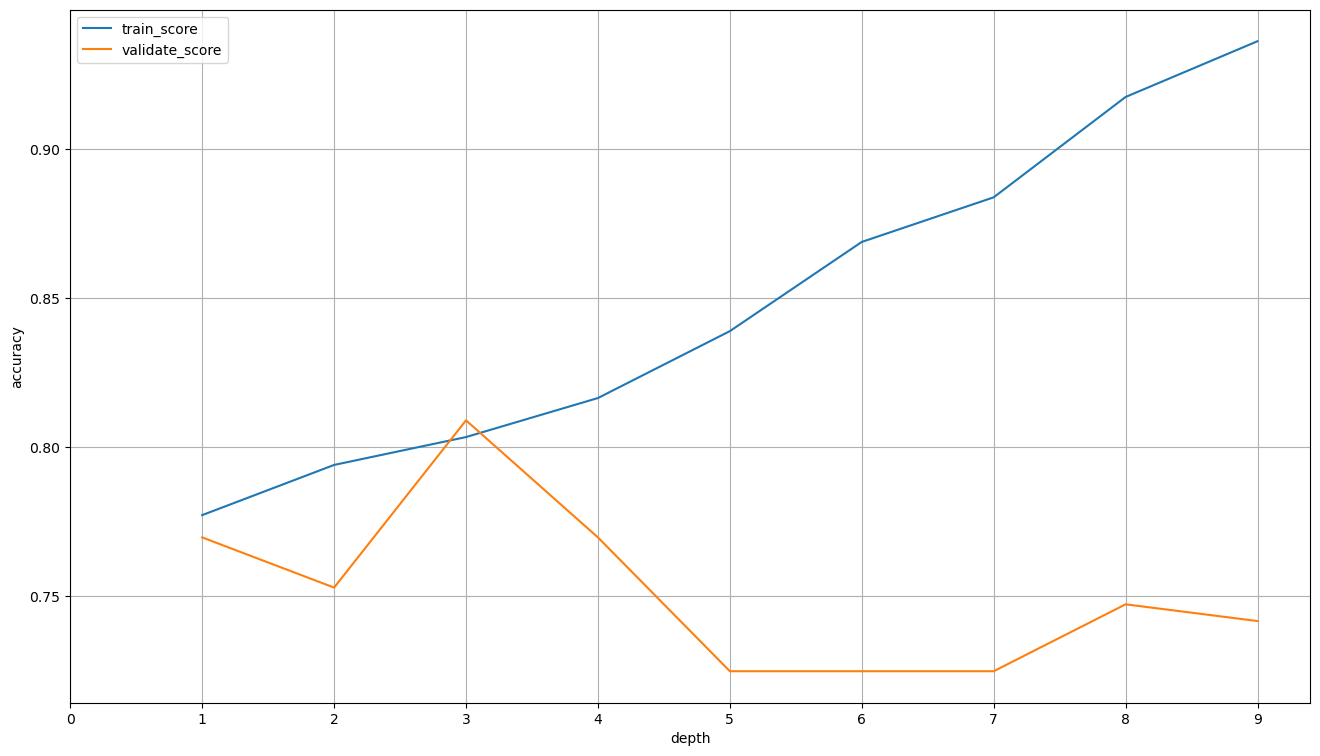

In [99]:
#FROM CLASS

metrics = []

# loop through different depths
for d in range(1,10):
    #MAKE the thing
    clf = DecisionTreeClassifier(max_depth=d, random_state=823)
    #FIT the thing
    clf = clf = clf.fit(X_train, y_train)
    #USE the thing
    train_score= clf.score(X_train, y_train)
    validate_score = clf.score(X_validate, y_validate)
    
    output = {
        "depth": d,
        "train_score": train_score,
        "validate_score": validate_score}
    
    metrics.append(output)
    
results = pd.DataFrame(metrics)

#PLOT the data
results.set_index('depth').plot(figsize=(16,9))
plt.ylabel('accuracy')
plt.xticks(np.arange(0,10,1))
plt.grid()
plt.show()

Which model performs better on your in-sample data?

The model with depth 3 performs best on the in-sample train set!

Which model performs best on your out-of-sample data, the validate set?

The same depth performs best on the Validate Set